## Solusi Numerik Sistem Pegas Teredam

10218009_Akram Akbar Amin_PR04 SPSF

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import arange, sin, cos, pi, sqrt, exp

In [ ]:
A = 4
B = 0
k = 0.5
m = 1
b = 0.4
t = arange(0.0, 50.05, 0.05)
teta = 0
w0 = k/m
a = b/2*m
w1 = sqrt((w0**2)-(a**2))

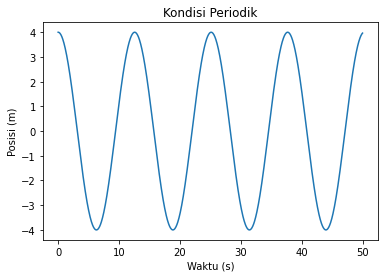

In [11]:
#Kasus Periodik
x_p = A*cos(w0*t + teta)
plt.plot(t,x_p)
plt.title('Kondisi Periodik')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.savefig('Periodik.png')
plt.show()

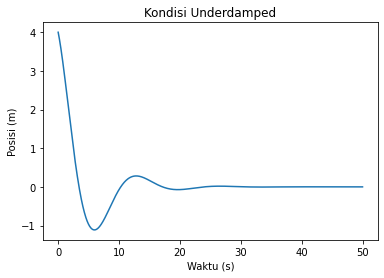

In [12]:
#Kasus Underdamped
x_u = A*exp(-a*t)*cos(w1*t + teta)
plt.plot(t,x_u)
plt.title('Kondisi Underdamped')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.savefig('Underdamped.png')
plt.show()

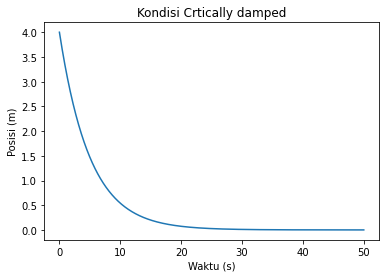

In [13]:
#Kasus Critically damped
x_c = (A + B*t)*exp(-a*t)
plt.plot(t,x_c)
plt.title('Kondisi Crtically damped')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.savefig('CriticallyDamped.png')
plt.show()

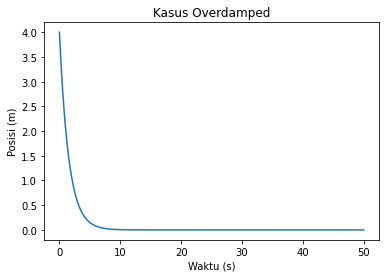

In [14]:
#Kasus Overdamped
x_o = exp(-a*t)*(B*exp(w1*t) + A*exp(-w1*t))
plt.plot(t,x_o)
plt.title('Kasus Overdamped')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.savefig('Overdamped.png')
plt.show()

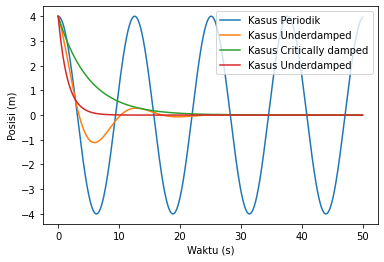

In [15]:
#Perbandingan
plt.plot(t,x_p, label='Kasus Periodik')
plt.plot(t,x_u, label='Kasus Underdamped')
plt.plot(t,x_c, label='Kasus Critically damped')
plt.plot(t,x_o, label='Kasus Underdamped')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.savefig('Kompilasi dan Perbandingan.png')
plt.legend()
plt.show()

In [22]:
k = 4
m = 1
dt = 0.05
a1 = 1
a2 = 2
a3 = 3
a4 = 0

In [24]:
v1 = np.empty(201)
v2 = np.empty(201)
v3 = np.empty(201)
v4 = np.empty(201)
x1 = np.empty(201)
x2 = np.empty(201)
x3 = np.empty(201)
x4 = np.empty(201)
t = np.empty(201)

In [25]:
v1[0], x1[0] = (0, 2)
v2[0], x2[0] = (0, 2)
v3[0], x3[0] = (0, 2)
v4[0], x4[0] = (0, 2)

In [26]:
for i in range(200):
  v1[i+1] = v1[i] - (a1/m)*v1[i]*dt - (k/m)*x1[i]*dt
  x1[i+1] = x1[i] + v1[i+1]*dt
  v2[i+1] = v2[i] - (a2/m)*v2[i]*dt - (k/m)*x2[i]*dt
  x2[i+1] = x2[i] + v2[i+1]*dt
  v3[i+1] = v3[i] - (a3/m)*v3[i]*dt - (k/m)*x3[i]*dt
  x3[i+1] = x3[i] + v3[i+1]*dt
  v4[i+1] = v4[i] - (a4/m)*v4[i]*dt - (k/m)*x4[i]*dt
  x4[i+1] = x4[i] + v4[i+1]*dt
  t[i+1] = i

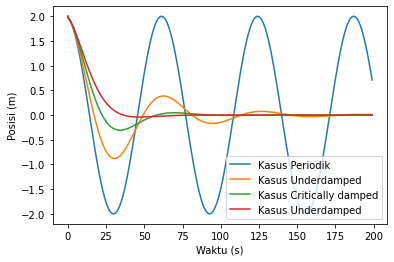

In [27]:
plt.plot(t,x4, label='Kasus Periodik')
plt.plot(t,x1, label='Kasus Underdamped')
plt.plot(t,x2, label='Kasus Critically damped')
plt.plot(t,x3, label='Kasus Underdamped')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.savefig('Kompilasi 2.png')
plt.legend()
plt.show()

In [31]:
def f1(t,x,y):
    return y

In [32]:
def k1(i):
    x=x0
    y1=y[0]
    y2=y[1]
    if i==0:
        return h*f1(x,y1,y2)
    else:
        return h*f2(x,y1,y2)
def k2(i):
    x=x0
    y1=y[0]+k1(0)/2
    y2=y[1]+k1(1)/2
    if i==0:
        return h*f1(x,y1,y2)
    else:
        return h*f2(x,y1,y2)

def k3(i):
    x=x0
    y1=y[0]+k2(0)/2
    y2=y[1]+k2(1)/2
    if i==0:
        return h*f1(x,y1,y2)
    else:
        return h*f2(x,y1,y2)
        
def k4(i):
    x=x0
    y1=y[0]+k3(0)
    y2=y[1]+k3(1)
    if i==0:
        return h*f1(x,y1,y2)
    else:
        return h*f2(x,y1,y2)

In [33]:
df0 = pd.DataFrame (columns=["t","x","v"])

def f2(t,x,y):
    return (-20*x)/20
x0 = 0
y = [1,0]
xf = 15
h = 0.1
new_row={"t":x0,"x":y[0], "v":y[1]}
df0= df0.append(new_row, ignore_index= True)

iter = int(xf/h)
for a in range(0,iter):
    hasil1 = y[0]+(k1(0)+2*(k2(0)+k3(0))+k4(0))/6
    hasil2 = y[1]+(k1(1)+2*(k2(1)+k3(1))+k4(1))/6
    y[0] = hasil1
    y[1] = hasil2
    x0 = x0+h
    new_row={"t":x0,"x":y[0], "v":y[1]}
    df0= df0.append(new_row, ignore_index= True)

In [34]:
df1 = pd.DataFrame (columns=["t","x","v"])

def f2(t,x,y):
    return (-5*y - 20*x)/20

x0 = 0
y = [1,0]
xf = 15
h = 0.1

new_row={"t":x0,"x":y[0], "v":y[1]}
df1= df1.append(new_row, ignore_index= True)
iter = int(xf/h)
for a in range(0,iter):
    hasil1 = y[0]+(k1(0)+2*(k2(0)+k3(0))+k4(0))/6
    hasil2 = y[1]+(k1(1)+2*(k2(1)+k3(1))+k4(1))/6
    y[0] = hasil1
    y[1] = hasil2
    x0 = x0+h
    new_row={"t":x0,"x":y[0], "v":y[1]}
    df1= df1.append(new_row, ignore_index= True)

In [35]:
df2 = pd.DataFrame (columns=["t","x","v"])

def f2(t,x,y):
    return -2*y-x

x0 = 0
y = [1,0]
xf = 15
h = 0.1

new_row={"t":x0,"x":y[0], "v":y[1]}
df2= df2.append(new_row, ignore_index= True)

iter = int(xf/h)
for a in range(0,iter):
    hasil1 = y[0]+(k1(0)+2*(k2(0)+k3(0))+k4(0))/6
    hasil2 = y[1]+(k1(1)+2*(k2(1)+k3(1))+k4(1))/6
    y[0] = hasil1
    y[1] = hasil2
    x0 = x0+h
    new_row={"t":x0,"x":y[0], "v":y[1]}
    df2= df2.append(new_row, ignore_index= True)

In [36]:
df3 = pd.DataFrame (columns=["t","x","v"])

def f2(t,x,y):
    return -10*y-x

x0 = 0
y = [1,0]
xf = 15
h = 0.1

new_row={"t":x0,"x":y[0], "v":y[1]}
df3= df3.append(new_row, ignore_index= True)

iter = int(xf/h)
for a in range(0,iter):
    hasil1 = y[0]+(k1(0)+2*(k2(0)+k3(0))+k4(0))/6
    hasil2 = y[1]+(k1(1)+2*(k2(1)+k3(1))+k4(1))/6
    y[0] = hasil1
    y[1] = hasil2
    x0 = x0+h
    new_row={"t":x0,"x":y[0], "v":y[1]}
    df3= df3.append(new_row, ignore_index= True)

In [49]:
df0123 = pd.DataFrame (columns=["t","x_periodik","x_under","x_critical","x_over"])
df0123.t = df1.t
df0123.x_periodik = df0.x
df0123.x_under = df1.x
df0123.x_critical = df2.x
df0123.x_over = df3.x
print(df0123)

        t x_periodik    x_under   x_critical    x_over
0       0          1          1            1         1
1     0.1   0.995004   0.995046     0.995321  0.996254
2     0.2   0.980067   0.980395     0.982476  0.988627
3     0.3   0.955337   0.956431     0.963063  0.979592
4     0.4   0.921061   0.923621     0.938447  0.970088
..    ...        ...        ...          ...       ...
146  14.6  -0.446474 -0.0359337  7.11916e-06  0.231161
147  14.7  -0.533574 -0.0508148  6.48298e-06  0.228837
148  14.8  -0.615342  -0.064827  5.90341e-06  0.226537
149  14.9  -0.690963 -0.0778535  5.37543e-06   0.22426
150    15  -0.759679 -0.0897902  4.89448e-06  0.222006

[151 rows x 5 columns]


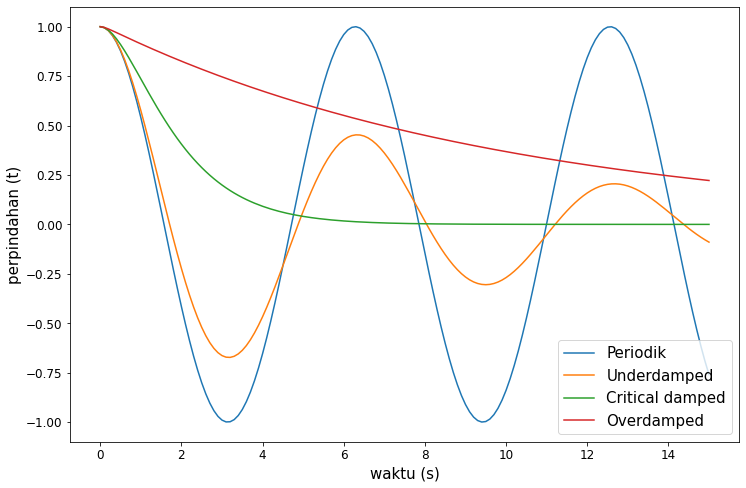

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
data_x = df0123.t
data_y0 = df0123.x_periodik
data_y1 = df0123.x_under
data_y2 = df0123.x_critical
data_y3 = df0123.x_over
ax.plot(data_x,data_y0, label='Periodik')
ax.plot(data_x,data_y1, label='Underdamped')
ax.plot(data_x,data_y2, label='Critical damped')
ax.plot(data_x,data_y3, label='Overdamped')
plt.rc('axes', labelsize =15)
plt.rc('xtick', labelsize =12)
plt.rc('ytick', labelsize =12)
plt.rc('legend', fontsize =15)
ax.set_xlabel('waktu (s)')
ax.set_ylabel('perpindahan (t)')
plt.savefig('Kompilasi 3.png')
plt.legend()
plt.show()

In [52]:
def integrate(F,x,y,xstop,h): 
    def run_kut4(F,x,y,h):
        k0 = h*F(x,y)
        k1 = h*F(x + h/2, y + k0/2)
        k2 = h*F(x + h/2, y + k1/2)
        k3 = h*F(x + h, y + k2)
        return (k0 + 2*k1 + 2*k2 + k3)/6
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xstop:
        h = min(h,xstop - x)
        y = y + run_kut4(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

In [53]:
m = 10
ko = 5
r = 1

In [54]:
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -(ko/m)*y[0]-(r/m)*y[1]
    return F

In [55]:
x = 0.0
xstop = 50
y = np.array([0.1,0.1])
h = 0.1
freq = 50
X,Y = integrate(F,x,y,xstop,h)
print(X,Y,freq)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

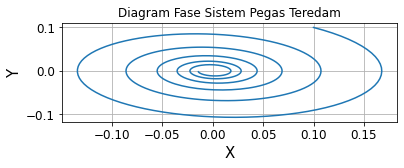

In [58]:
plt.subplot(2,1,1)
plt.plot(Y[:,0],Y[:,1],'-')
plt.title('Diagram Fase Sistem Pegas Teredam')
plt.xlabel('X'); plt.ylabel('Y')
plt.grid(True)
plt.savefig('Fase pegas teredam.png')

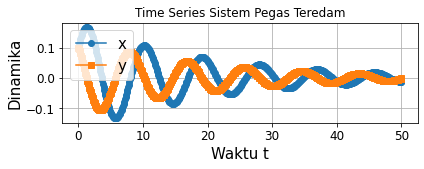

In [59]:
plt.subplot(2,1,2)
plt.plot(X,Y[:,0],'o-',X,Y[:,1],'s-')
plt.title('Time Series Sistem Pegas Teredam')
plt.xlabel('Waktu t'); plt.ylabel('Dinamika')
plt.legend(('x','y'),loc=0)
plt.grid(True)
plt.tight_layout()
plt.savefig('Time series pegas teredam.png')